# Spotify Track Dataset (Kurzfassung)

- **track_id**: Spotify-ID des Tracks
- **artists**: Namen der Künstler, getrennt durch `;`.
- **album_name**: Name des Albums.
- **track_name**: Titel des Tracks.
- **popularity**: Beliebtheit (0–100), basierend auf Wiedergaben und Aktualität.
- **duration_ms**: Länge in Millisekunden.
- **explicit**: Enthält explizite Inhalte (`true`/`false`).
- **danceability**: Eignung zum Tanzen (0.0–1.0).
- **energy**: Intensität und Aktivität (0.0–1.0).
- **key**: Tonart (0 = C, 1 = C♯/D♭, …, -1 = keine).
- **loudness**: Lautstärke in dB.
- **mode**: Tonart (1 = Dur, 0 = Moll).
- **speechiness**: Anteil gesprochener Wörter (0.0–1.0).
- **acousticness**: Wahrscheinlichkeit, dass der Track akustisch ist (0.0–1.0).
- **instrumentalness**: Wahrscheinlichkeit, dass der Track ohne Gesang ist (0.0–1.0).
- **liveness**: Wahrscheinlichkeit einer Live-Aufnahme (0.0–1.0).
- **valence**: Stimmung des Tracks (positiv/negativ, 0.0–1.0).
- **tempo**: Tempo in BPM (Schläge pro Minute).
- **time_signature**: Taktart (3 = 3/4, 4 = 4/4, …).
- **track_genre**: Genre des Tracks.

In [28]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so

dataFrm = pd.read_csv("./res/dataset.csv", na_values=['Not Provided'])
dataFrm.sample(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
92496,92496,4ioqGCkmubr8E86LaR80mv,Rebel Cats;Abulon,Rebel Cats Y Sus Amigos,La Chica Rockabilly,28,115293,False,0.363,0.971,...,-4.495,1,0.1610,0.0368,0.000000,0.063,0.677,185.945,4,rockabilly
11435,11435,50xwQXPtfNZFKFeZ0XePWc,The Beatles,Revolver (Remastered),Yellow Submarine - Remastered 2009,61,158880,False,0.604,0.549,...,-9.873,1,0.0389,0.5310,0.000000,0.438,0.696,111.398,4,british
21064,21064,0mtn3uti60qnEwTJJIQ29v,Omah Lay;Justin Bieber,On Chill - Rap & RnB,Attention,0,180563,False,0.817,0.720,...,-8.134,0,0.0809,0.1720,0.000726,0.109,0.384,119.989,4,dancehall


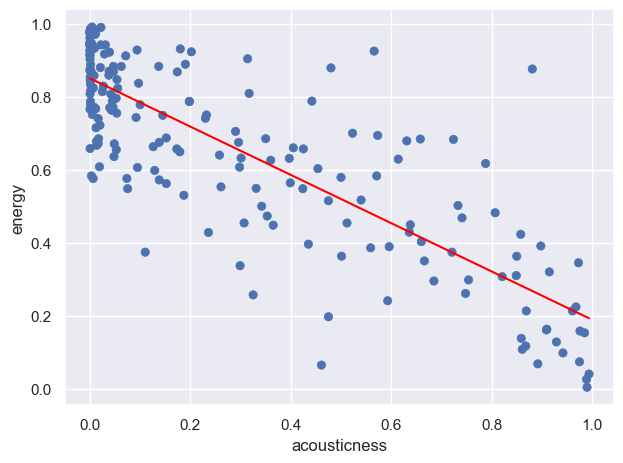

In [47]:

so.Plot(dataFrm.sample(200), x="acousticness", y="energy").add(
    so.Dot()  # Linie für die Regressionsanpassung
).add(so.Line(color='red'), so.PolyFit(order=1)).label(
    xlabel="X-Werte",
    ylabel="Y-Werte"
).scale(
    color_continuous="#1f77b4"  # Optionale Anpassung der Farbe
).show()


<Axes: >

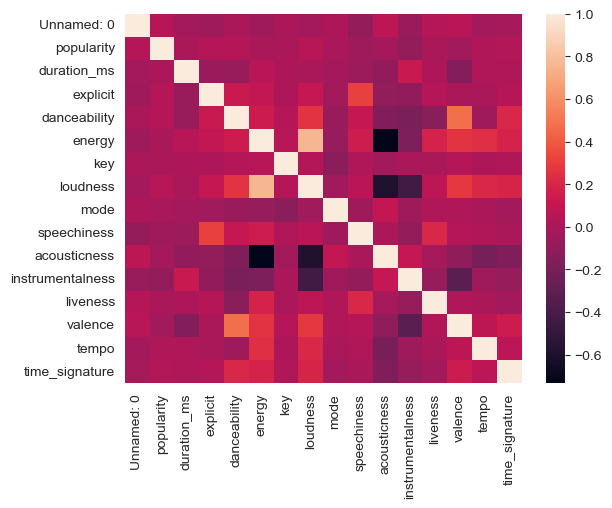

In [30]:
sns.heatmap(dataFrm.corr(numeric_only=True))


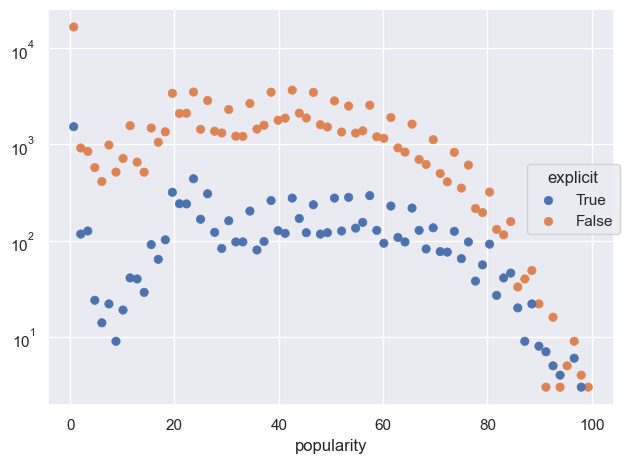

In [78]:
so.Plot(dataFrm, x="popularity", color="explicit").add(
    so.Dot(), so.Hist()
).scale(
    y="log",  # Logarithmische Skalierung der y-Achse
    color_continuous="#1f77b4"  # Optionale Farbanpassung
).show()
